In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and visualize data

In [56]:
outflow_data = pd.read_csv('4200 Modified Average Daily Streamflows.csv')
outflow_data.rename(columns={'Ice Harbor Daily Streamflows (unit:cfs)': 'Ice Harbor outflow (cfs)'}, inplace=True)
outflow_data.rename(columns={'Lower Monumental (unit:cfs)': 'Lower Monumental outflow (cfs)'}, inplace=True)
outflow_data.rename(columns={'Little Goose (unit:cfs)': 'Little Goose outflow (cfs)'}, inplace=True)
outflow_data.rename(columns={'Lower Granite (unit:cfs)': 'Lower Granite outflow (cfs)'}, inplace=True)
outflow_data['date'] = pd.to_datetime(outflow_data['date'])
display(outflow_data)

,date,Ice Harbor outflow (cfs),Lower Monumental outflow (cfs),Little Goose outflow (cfs),Lower Granite outflow (cfs)
0,1928-07-01,57769,57799,57767,56639
1,1928-07-02,50878,50908,50879,49861
2,1928-07-03,46994,47024,46984,46219
3,1928-07-04,45710,45740,45671,45121
4,1928-07-05,42466,42496,42425,41992
...,...,...,...,...,...
32959,2018-09-26,17428,18068,17945,17918
32960,2018-09-27,17526,18607,18484,18519
32961,2018-09-28,17245,18291,18170,18192
32962,2018-09-29,17863,18637,18515,18493


### Visualize one year

Text(0, 0.5, 'Outflow data from each dam (cfs)')

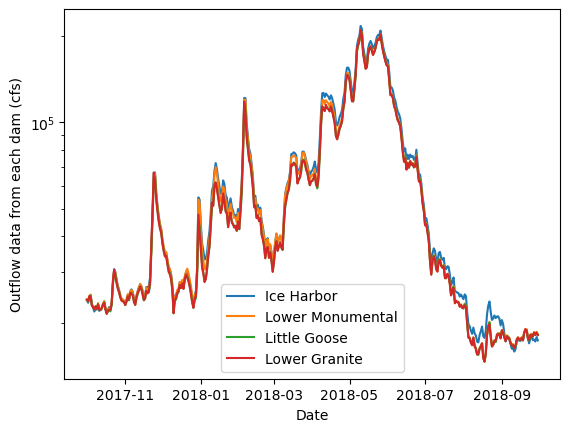

In [57]:
sns.lineplot(x='date', y='Ice Harbor outflow (cfs)', data=outflow_data[-365:], label='Ice Harbor')
sns.lineplot(x='date', y='Lower Monumental outflow (cfs)', data=outflow_data[-365:], label='Lower Monumental')
sns.lineplot(x='date', y='Little Goose outflow (cfs)', data=outflow_data[-365:], label='Little Goose')
sns.lineplot(x='date', y='Lower Granite outflow (cfs)', data=outflow_data[-365:], label='Lower Granite')

plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Outflow data from each dam (cfs)')

### Visualize entire dataset

Text(0, 0.5, 'Outflow data from each dam (cfs)')

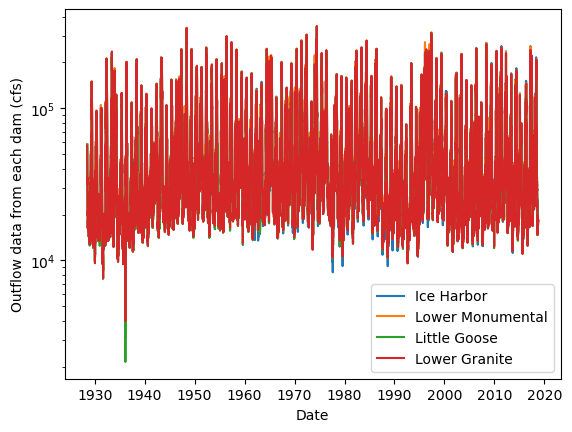

In [58]:
sns.lineplot(x='date', y='Ice Harbor outflow (cfs)', data=outflow_data, label='Ice Harbor')
sns.lineplot(x='date', y='Lower Monumental outflow (cfs)', data=outflow_data, label='Lower Monumental')
sns.lineplot(x='date', y='Little Goose outflow (cfs)', data=outflow_data, label='Little Goose')
sns.lineplot(x='date', y='Lower Granite outflow (cfs)', data=outflow_data, label='Lower Granite')

plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Outflow data from each dam (cfs)')

## Simulate reservoirs

In [68]:
x = 0
res_info = pd.DataFrame({'Names':['Ice Harbor','Lower Monumental','Little Goose','Lower Granite'],
                         'Reservoir surface area (m^2)':[9200*4047,6590*4047,10025*4047,8900*4047],
                         'Number of turbines':[6,6,6,6],
                         'Generation capacity (kW)':[603000,810000,903000,810000],
                         'Average tailwater elevation (m)':[x,x,x,x],
                         'Maximum pooling elevation (m)':[x,x,646.5,x]
                         })

res_info['Generation capacity (kW)'] = pd.to_numeric(res_info['Generation capacity (kW)'])
display(res_info)

eta = 0.8 # efficiency of turbines, assumed value
rho = 998 # density of water, 1000 kg/m^3
g = 9.81 # gravitational acceleration, 9.81 m/s^2

# generate inflow from previous reservoir outflow/gage data, and added runoff data
# PLASEHOLDER
def simulate_inflow(data):
    return data*1.1

# simulate reservoir
def simulate_reservoir(df, initial_storage, keep, resID):
    # df is a dataframe containing reservoir data. Has columns 'inflow (cfs)'
    #       and 'outflow (cfs)'. Timestep is in days.
    # keep is a boolean. Keep = 0, remove = 1
    # resID is the string name of the reservoir
    # this function will directly modify a DataFrame!
    info = res_info[res_info['Names'] == resID].iloc[0]
    df['storage (cf)'] = 0
    max_storage = info['Maximum pooling elevation (m)']*info['Reservoir surface area (m^2)']
    df.loc[0,'storage (cf)'] = initial_storage
    if keep == 0:
        df['storage (cf)'] = df['storage (cf)'].cumsum() + (df['inflow (cfs)'] - df['outflow (cfs)'])*86400
        df['storage (m^3)'] = np.minimum(df['storage (cf)']/35.315,max_storage)
        df['elevation head (m)'] = df['storage (m^3)']/info['Reservoir surface area (m^2)']
        df['power produced (kWh)'] = np.minimum(eta*rho*g*df['elevation head (m)']*df['storage (cf)']*info['Number of turbines'], info['Generation capacity (kW)'])
    else:
        df['storage (cf)'] = 0
        df['elevation head (m)'] = 0
        df['power produced (kWh)'] = 0
        df['outflow (cfs)'] = df['inflow (cfs)']

    return None

# simulate the whole system
def simulate_system(df):
    # - df is dataframe with Ice Harbor, Lower Monumental, Little Goose, and Lower Granite
    return None

,Names,Reservoir surface area (m^2),Number of turbines,Generation capacity (kW),Average tailwater elevation (m),Maximum pooling elevation (m)
0,Ice Harbor,37232400,6,603000,0,0.0
1,Lower Monumental,26669730,6,810000,0,0.0
2,Little Goose,40571175,6,903000,0,646.5
3,Lower Granite,36018300,6,810000,0,0.0


In [71]:
import reservoir_simulation

# simulate Little Goose reservoir
little_goose = pd.DataFrame(outflow_data['Little Goose outflow (cfs)'])
little_goose['inflow (cfs)'] = simulate_inflow(little_goose['Little Goose outflow (cfs)'])
little_goose.rename(columns={'Little Goose outflow (cfs)':'outflow (cfs)'}, inplace=True)
display(little_goose)
simulate_reservoir(little_goose,100000,0,'Little Goose')
display(little_goose)

,outflow (cfs),inflow (cfs)
0,57767,63543.7
1,50879,55966.9
2,46984,51682.4
3,45671,50238.1
4,42425,46667.5
...,...,...
32959,17945,19739.5
32960,18484,20332.4
32961,18170,19987.0
32962,18515,20366.5


,outflow (cfs),inflow (cfs),storage (cf),storage (m^3),elevation head (m),power produced (kWh)
0,57767,63543.7,4.992069e+08,1.413583e+07,0.348421,903000.0
1,50879,55966.9,4.396946e+08,1.245065e+07,0.306884,903000.0
2,46984,51682.4,4.060418e+08,1.149771e+07,0.283396,903000.0
3,45671,50238.1,3.946974e+08,1.117648e+07,0.275478,903000.0
4,42425,46667.5,3.666520e+08,1.038233e+07,0.255904,903000.0
...,...,...,...,...,...,...
32959,17945,19739.5,1.551448e+08,4.393170e+06,0.108283,903000.0
32960,18484,20332.4,1.598018e+08,4.525039e+06,0.111533,903000.0
32961,18170,19987.0,1.570888e+08,4.448217e+06,0.109640,903000.0
32962,18515,20366.5,1.600696e+08,4.532624e+06,0.111720,903000.0
